<h3 style="text-align: center;"><strong>ESCUELA DE INGENIERÍA INFORMÁTICA - UNIVERSIDAD DE SEVILLA</strong></h3>
<h3 style="text-align: center;"><strong>GRADO EN INGENIERÍA INFORMÁTICA-TECNOLOGÍAS INFORMÁTICAS</strong></h3>
<h1 style="font-size: 1em; text-align: center;"><strong>DEPARTAMENTO DE MATEMÁTICA APLICADA I<br /></strong></h1>
<h2 style="font-size: 1.17em; text-align: center;"><strong>TRABAJO DE FIN DE GRADO - JOAN VILLALONGA ÁLVARO</strong></h2>

<p>En el trabajo se presentan los siguientes apartados:</p>
<p>1) <a href="#intrografo">Apertura de archivo y lectura de la matriz</a>.</p>
<p>2) <a href="#centralidadGrado">Normalización de la matriz y representación en una imágen a escala de grises</a>.</p>
<p>3) <a href="#inforgrafo">RIPS: Cálculo de la homología persistente y entropía persistente</a>.</p>
<p>4) <a href="#operagrafo">Entropías calculadas mediante filtración lower-star.</a>.</p>

<p>Primero importamos las librerías correspondientes:</p>

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from ripser import Rips
import persim
from persim import plot_diagrams
from persim import persistent_entropy
import os
import math
import scipy
from scipy import ndimage
import PIL
from ripser import ripser, lower_star_img

<h2>1. Apertura de archivo y lectura de la matriz</h2>

<p>Abrimos un archivo, leemos sus datos, y los convertimos en una matriz:</p>

In [2]:
def lee_archivo_dev_matriz(nombre_archivo):
    carpeta = 'Datos/dailyOccmatrices/'
    ruta_archivo = os.path.join(carpeta, nombre_archivo)
    with open(ruta_archivo, 'r') as archivo_csv:
        lector_csv = csv.reader(archivo_csv)
        matriz = []

        for fila in lector_csv:

            fila_enteros = [int(elemento) for elemento in fila]
            matriz.append(fila_enteros)

    matrix = np.array(matriz)
    return(matrix)

matrix = lee_archivo_dev_matriz('occ2016120.csv')

print(matrix)
print(matrix[19,19])

[[ 31676 132483   6177   5016   4246   2610   1999   1772    746    536
    1971    266    195    165    107     75     84    100     52    589]
 [  3008  22327   1492    605    540    324    298    226    141     89
     106     61     39     34     21     22     22     27     13    167]
 [  2833   7368    492    117     79     72     39     40     46     27
      19     18     15     14     11     13      4      6      4    106]
 [   644   3545    131    141     28     37     21     26     13     11
       3      4      6      7      3      1      2      2      4     54]
 [   734   2079     68     27     15     17     17     10     11      3
       5      2      4      0      2      1      1      2      1     24]
 [   279   1220     38      9     11     14      6     10     11      5
       2      1      0      1      1      0      1      1      0     22]
 [   163    807     26      9     13      9      7      3      3      2
       7      0      0      1      0      0      0      1 

<h2>2. Normalización de la matriz y representación en una imágen a escala de grises</h2>

<p>Creamos la función normalizar_a_escala_de_grises, que normalizará los datos de la matriz para transformarlos al formato correspondiente a una imágen a escala de grises, es decir, que cada elemento está comprendido entre 0 y 255</p>

In [3]:
def normalizar_a_escala_de_grises(matr):
    #Calculamos el minimo y el maximo de la matriz
    maxim, minim = matr.max(), matr.min()
    #Creamos una lista vacía que sera la matriz que devolvamos
    res = []
    #Recorremos cada fila de la matriz 
    for i in range(20):
        #Creamos una lista por cada fila a la que iremos añadiendo los elementos normalizados
        fila = []
        #Recorremos cada elemento de cada fila
        for j in range(20):
            #Guardamos en elem el elemento actual que vamos a transformar
            elem = matr[i, j]
            #Guardamos en nuevo_elem el elemento normalizado y transformado a escala de grises
            nuevo_elem = ((elem-minim)/(maxim-minim))*255
            #Añadimos a la fila el elemento normalizado
            fila.append(int(nuevo_elem))
        #Añadimos la fila a la lista que representa la matriz resultante
        res.append(fila)
    #Devolvemos la matriz resultante 
    return np.array(res)
#Guardamos en la variable reslutado la matriz final
resultado = normalizar_a_escala_de_grises(matrix)
print(resultado)

[[ 60 255  11   9   8   5   3   3   1   1   3   0   0   0   0   0   0   0
    0   1]
 [  5  42   2   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  5  14   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  1   6   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  1   4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

<p>Representamos la imágen a escala de grises:</p>

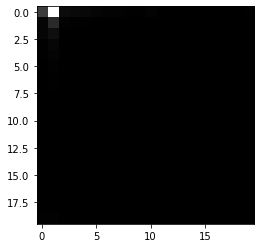

In [4]:
#Mostramos la imagen en escala de grises
plt.imshow(resultado, cmap='gray') 
plt.show()

<h2>3. RIPS: Cálculo de la homología persistente y entropía persistente</h2>

<p>Creamos el método que calculará la homología persistente y a partir de este resultado calculamos la entropía persistente:</p>

In [5]:
def calcula_rips(matriz):
    ##Dimensión de la matriz cuadrada##
    ind=20
    ##Creamos un array vacío con las dimensiones que necesitamos##
    data = np.zeros((ind*ind, 3))
    ##Transformamos la matriz al formato que necesitamos para calcular la homología con Rips##
    for i in range(ind):
        for j in range(ind):
            data[i*ind+j][0] = i
            data[i*ind+j][1] = j
            data[i*ind+j][2] = matriz[i][j]

    rips = Rips(maxdim=0)
    diagrams = rips.fit_transform(data)
    #rips.plot(diagrams)
    entropia = persim.persistent_entropy.persistent_entropy(diagrams, keep_inf=False, val_inf=None, normalize=False)
    return entropia


<p>Ahora comprobaremos que podemos hacerlo para todo el conjunto de archivos que hay en la carpeta y haciendo el gráfico para todos los archivos(se ha dibujado sólo el archivo de algunos días para que se viera más claro:</p>

In [6]:
carpeta = 'Datos/dailyOccmatrices'
mat2017 = [mat for mat in os.listdir(carpeta) if "occ2017" in mat]
dicc_entropia_rips = {}

for nombre_archivo in mat2017:
    if nombre_archivo.endswith('.csv'): 
        ##Leemos el archivo y creamos la matriz##
        matrix = lee_archivo_dev_matriz(nombre_archivo)
        #print(nombre_archivo)
        dicc_entropia_rips[nombre_archivo] = calcula_rips(matrix)

Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbos

Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbos

Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbos

Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbos

<p>Representación del todo el conjunto de datos:</p>

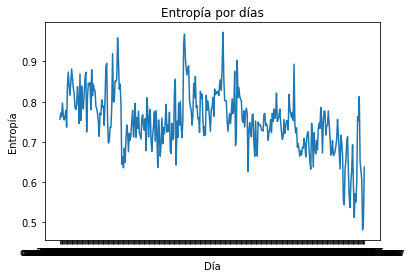

In [7]:
##Dibujamos el gráfico con los datos del diccionario##
claves_rips = list(dicc_entropia_rips.keys())
valores_rips = list(dicc_entropia_rips.values())


fig, ax = plt.subplots()
ax.plot(claves_rips, valores_rips)

ax.set_title('Entropía por días')
ax.set_xlabel('Día')
ax.set_ylabel('Entropía')
plt.show()

In [8]:
clave_max = max(dicc_entropia_rips, key=dicc_entropia_rips.get)
clave_min = min(dicc_entropia_rips, key=dicc_entropia_rips.get)

print("La clave asociada al valor máximo mediante Rips es:", clave_max, " con entropía igual a: ", dicc_entropia_rips[clave_max])
print("La clave asociada al valor mínimo mediante Rips es:", clave_min, " con entropía igual a: ", dicc_entropia_rips[clave_min])

La clave asociada al valor máximo mediante Rips es: occ2017196.csv  con entropía igual a:  [0.97258664]
La clave asociada al valor mínimo mediante Rips es: occ2017363.csv  con entropía igual a:  [0.48143364]


<p>Ahora imprimiremos dichas matrices para ver qué diferencia hay entre ambas:</p>

In [9]:
matriz_maxima = lee_archivo_dev_matriz(clave_max)
matriz_minima = lee_archivo_dev_matriz(clave_min)
print("La matriz con mayor entropía mediante Rips es:")
print(matriz_maxima)
print("======================================================")
print("La matriz con menor entropía mediante Rips es:")
print(matriz_minima)

La matriz con mayor entropía mediante Rips es:
[[ 16433 121686   3872   1384    603    495    324    336    306    201
     526    138    121     83     84     64     56     48     46    626]
 [  3007  27524   1168    317    105     83     74     45     43     28
      29     26     29     16     13     21     15     13     26    146]
 [  1299   7818    445    244     64     61     51     52     26     19
      18     15     18     15      9     15     12     12      8     62]
 [   741   3685    160     99    101     64     29     18     14     14
      20      8     13      9      7     11      7      4      4     65]
 [   449   2045    104     32     39     72     22      8     13      7
       5      8      6      6      1      2      4      6      7     48]
 [   401   1345     65     26     27     43     20     14     13     12
       7      8      4      4      3      2      5      7      5     29]
 [   223    789     31     26     20     14     12     17     14     11
       7   

Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


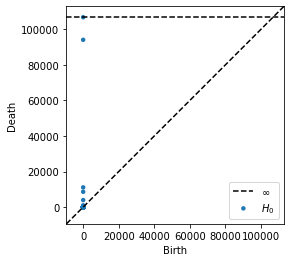

Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


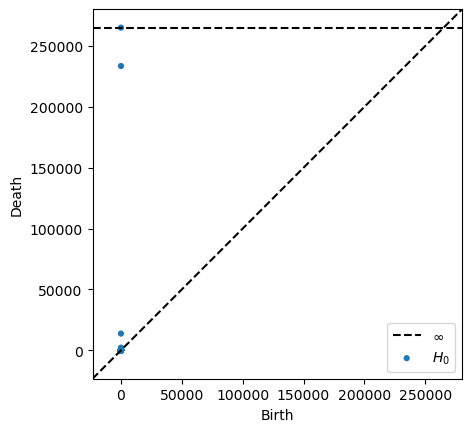

In [10]:
def plot_barcode(matriz):
    ##Dimensión de la matriz cuadrada##
    ind=20
    ##Creamos un array vacío con las dimensiones que necesitamos##
    data = np.zeros((ind*ind, 3))
    ##Transformamos la matriz al formato que necesitamos para calcular la homología con Rips##
    for i in range(ind):
        for j in range(ind):
            data[i*ind+j][0] = i
            data[i*ind+j][1] = j
            data[i*ind+j][2] = matriz[i][j]

    rips = Rips(maxdim=0)
    diagrams = rips.fit_transform(data)
    plot_diagrams(diagrams, show=True)
plot_barcode(matriz_maxima)
plot_barcode(matriz_minima)

<h2>4. Entropías calculadas mediante filtración lower-star.</h2>

<h3>4.1. Entropías calculadas con lower-star. Experimento 1 (distancia a la diagonal).</h3>

<p>A partir de la matriz máxima sin normalizar calculamos la homología persistente mediante lower-star y a partir de ahí calculamos los dos puntos más alejados de la diagonal (los que tengan mayor x-y) y con esos dos puntos calculamos la entropía persistente:</p>

In [11]:
carpeta = 'Datos/dailyOccmatrices'
mat2017 = [mat for mat in os.listdir(carpeta) if "occ2017" in mat]

##Creamos el diccionario en el que meteremos la entropía asociada a cada día para el gráfico##
dicc_entropia_lwrstar1 = {}
##Pondemos el minimo inicial como infinito puesto que cualquier valor va a ser menor##
minimo = float('inf')
##Recorremos todos los archivos y calculamos el mínimo número de puntos##
for nombre_archivo in mat2017:
    if nombre_archivo.endswith('.csv'): 
        ##Leemos el archivo y creamos la matriz##
        matrix = lee_archivo_dev_matriz(nombre_archivo)
        
        ##Calculamos los puntos con lower-star##
        diagrams = lower_star_img(matrix)
        ##Si el número de puntos que obtenemos es menor que el mínimo, este pasa a ser el número de puntos actual##
        if len(diagrams)<minimo:
            minimo=len(diagrams)
##Restamos uno puesto que para cada día hay un punto con una componente infinita y este debemos ignorarlo puesto que no nos da información útil en nuestro caso##
minimo=minimo-1

##Volvemos a recorrer las matrices de cada día ahora si para calcular la entropía con el número mínimo de puntos (el mismo número de puntos para todos las matrices)##
for nombre_archivo in mat2017:
    if nombre_archivo.endswith('.csv'): 
        ##Leemos el archivo y creamos la matriz##
        matrix = lee_archivo_dev_matriz(nombre_archivo)
        ##Sabiendo el mínimo número de puntos, calculamos homología con lower-star y entropía de los puntos mas alejados de la diagonal## 
        dgms_resultado = lower_star_img(matrix)
        dst_puntos = {}
        ##Para cada punto calculamos su distancia a la diagonal y la metemos en un diccionario##
        for punto in dgms_resultado:
            dst_puntos[tuple(punto)] = abs(punto[0]-punto[1])
        ##Metemos en una lista estos puntos ordenados por mayor distancia a la diagonal eliminando el punto infinito que es el que mayor distancia a la diagonal tendrá##
        puntos_mas_alejados = sorted(dst_puntos, key=dst_puntos.get, reverse=True)[1:minimo+1]
        ##Creamos una lista para cada día en la que meteremos los puntos que vamos a usar para calcular la entropía##
        puntos_mas_alejados_para_entropia = []
        ##Se hace de esta forma para que los puntos tengan el formato adecuado##
        for i in range(len(puntos_mas_alejados)):
            for j in range(len(dgms_resultado)):
                if puntos_mas_alejados[i][0]==dgms_resultado[j][0] and puntos_mas_alejados[i][1]==dgms_resultado[j][1]:
                    puntos_mas_alejados_para_entropia.append(dgms_resultado[j])        
        ##Transformamos la lista en un array para poder calcular la entropía##
        puntos_mas_alejados_para_entropia = np.array(puntos_mas_alejados_para_entropia)
        entropia = persim.persistent_entropy.persistent_entropy(puntos_mas_alejados_para_entropia, keep_inf=False, val_inf=None, normalize=False)
        ##Metemos en el diccionario final la entropía asociada al día en concreto##
        dicc_entropia_lwrstar1[nombre_archivo] = entropia

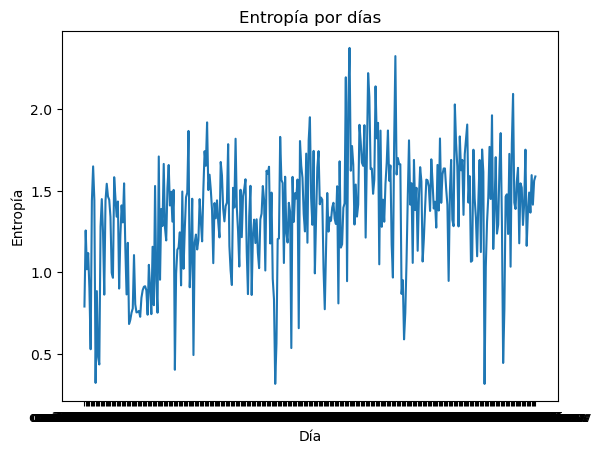

In [12]:
##Dibujamos el gráfico con los datos del diccionario##
claves_lwst1 = list(dicc_entropia_lwrstar1.keys())
valores_lwst1 = list(dicc_entropia_lwrstar1.values())


fig, ax = plt.subplots()
ax.plot(claves_lwst1, valores_lwst1)

ax.set_title('Entropía por días')
ax.set_xlabel('Día')
ax.set_ylabel('Entropía')
plt.show()

In [13]:
clave_max_lwst1 = max(dicc_entropia_lwrstar1, key=dicc_entropia_lwrstar1.get)
clave_min_lwst1 = min(dicc_entropia_lwrstar1, key=dicc_entropia_lwrstar1.get)

print("La clave asociada al valor máximo mediante Lower Star es:", clave_max_lwst1, " con entropía igual a: ", dicc_entropia_lwrstar1[clave_max_lwst1])
print("La clave asociada al valor mínimo mediante Lower Star es:", clave_min_lwst1, " con entropía igual a: ", dicc_entropia_lwrstar1[clave_min_lwst1])

matriz_maxima_lwst1 = lee_archivo_dev_matriz(clave_max_lwst1)
matriz_minima_lwst1 = lee_archivo_dev_matriz(clave_min_lwst1)
print("La matriz con mayor entropía mediante Lower Star es:")
print(matriz_maxima_lwst1)
print("======================================================")
print("La matriz con menor entropía mediante Lower Star es:")
print(matriz_minima_lwst1)

La clave asociada al valor máximo mediante Lower Star es: occ2017215.csv  con entropía igual a:  [2.37714433]
La clave asociada al valor mínimo mediante Lower Star es: occ2017324.csv  con entropía igual a:  [0.31606166]
La matriz con mayor entropía mediante Lower Star es:
[[ 19556 128308   4514   1211    547    509    328    309    277    215
     436    132    134    119    113     91     70     69     57    985]
 [  6491  21913   1286    312    108     97     44     43     31     39
      36     19     17      7     17     12     15     15      9    183]
 [  2879   7759   1881    213     69     79     65    211     91     39
      29     12     14      8     13      3      5      5      4     96]
 [  1507   3933    130     53     79     95     33     32     14     18
       6     14      9      4      5      4      4      4      2     89]
 [   848   2168     48     31     33     96     23     22      8     18
       8      4      2      2      6      4      4      3      3     45]
 [

<h3>4.2. Entropías calculadas con lower-star. Experimento 2 (cambio de signo).</h3>

<p>Ahora se va a proceder a calcular de la otra forma que se comentó en la tutoría, cambiando los signos a los puntos y a partir de ahí calcular la entropía con todos los puntos:</p>

In [14]:
carpeta = 'Datos/dailyOccmatrices'
mat2017 = [mat for mat in os.listdir(carpeta) if "occ2017" in mat]

##Creamos el diccionario en el que meteremos la entropía asociada a cada día para el gráfico##
dicc_entropia_lwrstar2 = {}
##Pondemos el minimo inicial como infinito puesto que cualquier valor va a ser menor##
minimo = float('inf')
##Recorremos todos los archivos y calculamos el mínimo número de puntos##
for nombre_archivo in mat2017:
    if nombre_archivo.endswith('.csv'): 
        ##Leemos el archivo y creamos la matriz##
        matrix = lee_archivo_dev_matriz(nombre_archivo)
        
        ##Calculamos los puntos con lower-star##
        diagrams = lower_star_img(-matrix)
        ##Si el número de puntos que obtenemos es menor que el mínimo, este pasa a ser el número de puntos actual##
        if len(diagrams)<minimo:
            minimo=len(diagrams)
##Restamos uno puesto que para cada día hay un punto con una componente infinita y este debemos ignorarlo puesto que no nos da información útil en nuestro caso##
minimo=minimo-1

##Volvemos a recorrer las matrices de cada día ahora si para calcular la entropía con el número mínimo de puntos (el mismo número de puntos para todos las matrices)##
for nombre_archivo in mat2017:
    if nombre_archivo.endswith('.csv'): 
        ##Leemos el archivo y creamos la matriz##
        matrix = lee_archivo_dev_matriz(nombre_archivo)
        ##Sabiendo el mínimo número de puntos, calculamos homología con lower-star y entropía de los puntos mas alejados de la diagonal## 
        dgms_resultado = lower_star_img(-matrix)
        dst_puntos = {}
        ##Para cada punto calculamos su distancia a la diagonal y la metemos en un diccionario##
        for punto in dgms_resultado:
            dst_puntos[tuple(punto)] = abs(punto[0]-punto[1])
        ##Metemos en una lista estos puntos ordenados por mayor distancia a la diagonal eliminando el punto infinito que es el que mayor distancia a la diagonal tendrá##
        puntos_mas_alejados = sorted(dst_puntos, key=dst_puntos.get, reverse=True)[1:minimo+1]
        ##Creamos una lista para cada día en la que meteremos los puntos que vamos a usar para calcular la entropía##
        puntos_mas_alejados_para_entropia = []
        ##Se hace de esta forma para que los puntos tengan el formato adecuado##
        for i in range(len(puntos_mas_alejados)):
            for j in range(len(dgms_resultado)):
                if puntos_mas_alejados[i][0]==dgms_resultado[j][0] and puntos_mas_alejados[i][1]==dgms_resultado[j][1]:
                    puntos_mas_alejados_para_entropia.append(dgms_resultado[j])        
        ##Transformamos la lista en un array para poder calcular la entropía##
        puntos_mas_alejados_para_entropia = np.array(puntos_mas_alejados_para_entropia)
        entropia = persim.persistent_entropy.persistent_entropy(puntos_mas_alejados_para_entropia, keep_inf=False, val_inf=None, normalize=False)
        ##Metemos en el diccionario final la entropía asociada al día en concreto##
        dicc_entropia_lwrstar2[nombre_archivo] = entropia

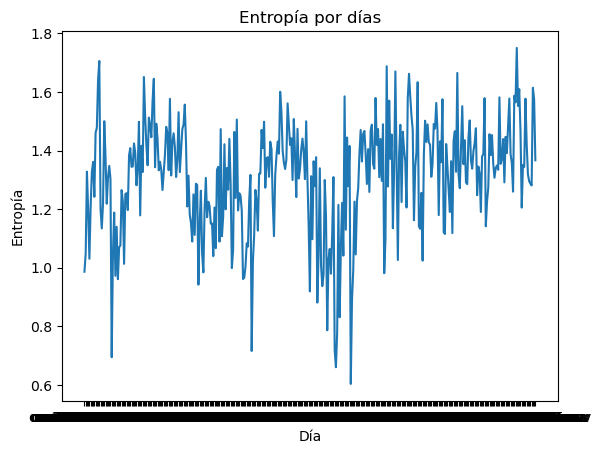

In [15]:
##Dibujamos el gráfico con los datos del diccionario##
claves_lwst2 = list(dicc_entropia_lwrstar2.keys())
valores_lwst2 = list(dicc_entropia_lwrstar2.values())


fig, ax = plt.subplots()
ax.plot(claves_lwst2, valores_lwst2)

ax.set_title('Entropía por días')
ax.set_xlabel('Día')
ax.set_ylabel('Entropía')
plt.show()

In [16]:
clave_max_lwst2 = max(dicc_entropia_lwrstar2, key=dicc_entropia_lwrstar2.get)
clave_min_lwst2 = min(dicc_entropia_lwrstar2, key=dicc_entropia_lwrstar2.get)

print("La clave asociada al valor máximo mediante Upper Star es:", clave_max_lwst2, " con entropía igual a: ", dicc_entropia_lwrstar2[clave_max_lwst2])
print("La clave asociada al valor mínimo mediante Upper Star es:", clave_min_lwst2, " con entropía igual a: ", dicc_entropia_lwrstar2[clave_min_lwst2])

matriz_maxima_lwst2 = lee_archivo_dev_matriz(clave_max_lwst2)
matriz_minima_lwst2 = lee_archivo_dev_matriz(clave_min_lwst2)
print("La matriz con mayor entropía mediante Upper Star cambiando el signo de la matriz es:")
print(matriz_maxima_lwst2)
print("======================================================")
print("La matriz con menor entropía mediante Upper Star cambiando el signo de la matriz es:")
print(matriz_minima_lwst2)

La clave asociada al valor máximo mediante Upper Star es: occ2017350.csv  con entropía igual a:  [1.75061545]
La clave asociada al valor mínimo mediante Upper Star es: occ2017216.csv  con entropía igual a:  [0.60328698]
La matriz con mayor entropía mediante Upper Star cambiando el signo de la matriz es:
[[ 28309 252806  11172   2067    998    783    449    448    397    396
     478    190    165    160    156    122    117     96     84   1976]
 [  5409  32067   1869    295    134    110     47     61     47     30
      32     24     21     30     22     22     19     16     17    325]
 [  2040  10245    436    169   1104     79     46     34     24     25
      19     26     22     14      9      8      7      7     11    118]
 [   974   4337    419    133    101     95     36     34     25     18
      13     11     13     14     13     11     10     10      4    103]
 [   599   2650     82     47     43    125     20     22     19     16
      16     11      5     10      8      5

<h2>5. Experimentación con matrices normalizadas.</h2>

<p>Tras observar los resultados obtenidos mediante Vietoris Rips, decidimos normalizar la matriz, pero no tal y como se hizo para poder representarla como una imágen, sino con valores entre 0 y 1 con decimales para no perder nada de información. </p>

In [17]:
def normalizar(matr):
    #Calculamos el minimo y el maximo de la matriz
    maxim, minim = matr.max(), matr.min()
    #Creamos una lista vacía que sera la matriz que devolvamos
    res = []
    #Recorremos cada fila de la matriz 
    for i in range(20):
        #Creamos una lista por cada fila a la que iremos añadiendo los elementos normalizados
        fila = []
        #Recorremos cada elemento de cada fila
        for j in range(20):
            #Guardamos en elem el elemento actual que vamos a transformar
            elem = matr[i, j]
            #Guardamos en nuevo_elem el elemento normalizado 
            nuevo_elem = ((elem-minim)/(maxim-minim))*1000
            #Añadimos a la fila el elemento normalizado
            fila.append(nuevo_elem)
        #Añadimos la fila a la lista que representa la matriz resultante
        res.append(fila)
    #Devolvemos la matriz resultante 
    return np.array(res)
#Guardamos en la variable reslutado la matriz final
print(matrix)
print("==========================")
resultado = normalizar(matrix)
print(resultado)
print(calcula_rips(matrix))
print(calcula_rips(resultado))

[[ 18885 175967   5230   1116    676    616    368    335    275    244
     397    165    147    119    117    103     76     84     66   1534]
 [  4543  22059   1233    355    308    253     65     49     42     19
      36     28     21     16     12     14     16      8      7    251]
 [  1834   6453    190    101    348    147     43     37     24     12
      54     32     29     24     14     28      9     10     10    126]
 [   899   2603     94     61     43     32     12     15     17     12
      23     27     19     20     12      8      8      3      4     89]
 [   622   1900     95     30     36     18     13     13     12      9
      26     14      4     10      9      2      1      3      2     63]
 [   363   1000     37     15     15     19     17      7      9      8
       9      9      6      3      2      4      6      3      7     50]
 [   255    637     28     12     12     13      4      7      4      3
      13      6      1      3      0      4      1      2 

<h3>5.1. Entropías calculadas con Vietoris Rips normalizando la matriz.</h3>

In [18]:
carpeta = 'Datos/dailyOccmatrices'
mat2017 = [mat for mat in os.listdir(carpeta) if "occ2017" in mat]
dicc_entropia_rips_normalizado = {}

for nombre_archivo in mat2017:
    if nombre_archivo.endswith('.csv'): 
        ##Leemos el archivo y creamos la matriz##
        matrix = lee_archivo_dev_matriz(nombre_archivo)
        #print(nombre_archivo)
        matrix2 = normalizar(matrix)
        dicc_entropia_rips_normalizado[nombre_archivo] = calcula_rips(matrix2)

Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbos

Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbos

Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbos

Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=0, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbos

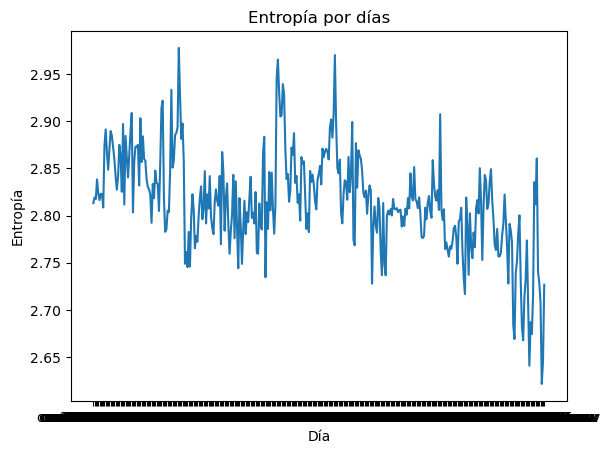

In [19]:
##Dibujamos el gráfico con los datos del diccionario##
claves_rips_norm = list(dicc_entropia_rips_normalizado.keys())
valores_rips_norm = [x[0] for x in list(dicc_entropia_rips_normalizado.values())]

fig, ax = plt.subplots()
ax.plot(claves_rips_norm, valores_rips_norm)

ax.set_title('Entropía por días')
ax.set_xlabel('Día')
ax.set_ylabel('Entropía')
plt.show()

In [20]:
def imprim_mat(mat):
    for fila in mat:
    # Recorrer cada elemento de la fila
        for elemento in fila:
            # Imprimir el elemento
            print(elemento, end=' ')
        # Imprimir una nueva línea después de cada fil
        print()
        

from matplotlib import pyplot

In [21]:
clave_max_rips_norm = max(dicc_entropia_rips_normalizado, key=dicc_entropia_rips_normalizado.get)
clave_min_rips_norm = min(dicc_entropia_rips_normalizado, key=dicc_entropia_rips_normalizado.get)

print("La clave asociada al valor máximo mediante Rips es:", clave_max_rips_norm, " con entropía igual a: ", dicc_entropia_rips_normalizado[clave_max_rips_norm])
print("La clave asociada al valor mínimo mediante Rips es:", clave_min_rips_norm, " con entropía igual a: ", dicc_entropia_rips_normalizado[clave_min_rips_norm])

matriz_maxima_rips_norm = lee_archivo_dev_matriz(clave_max_rips_norm)
matriz_minima_rips_norm = lee_archivo_dev_matriz(clave_min_rips_norm)
print("La matriz con mayor entropía mediante Rips es:")


print(matriz_maxima_rips_norm)
print("======================================================")
print("La matriz con menor entropía mediante Rips es:")
print(matriz_minima_rips_norm)

La clave asociada al valor máximo mediante Rips es: occ2017070.csv  con entropía igual a:  [2.97779676]
La clave asociada al valor mínimo mediante Rips es: occ2017363.csv  con entropía igual a:  [2.62141786]
La matriz con mayor entropía mediante Rips es:
[[ 35204 152063   4300   1310    575    372    376    398    278    267
    1065    120     94     78     66     73     44     58     51    745]
 [  3031  21923    886    400    138     88     71     47     49     39
     237     18     25     21     19     24     19     17     25    215]
 [  1436   8683    490    130     50     50     35     16     22     22
     109     11      6      8      8     13     11     11     21    153]
 [   816   4184    190    131     73    123     17     13     10     11
      58      8      6     13      5     10      4      6     11    123]
 [   502   2461    106     50     36     27     20     12     11      5
      17      4      7      4      5      6      7      6      5     70]
 [   413   1461     

<h3>5.2. Entropías calculadas con Lower Star normalizando la matriz.</h3>

In [22]:
carpeta = 'Datos/dailyOccmatrices'
mat2017 = [mat for mat in os.listdir(carpeta) if "occ2017" in mat]

##Creamos el diccionario en el que meteremos la entropía asociada a cada día para el gráfico##
dicc_entropia_lwrstar1_norm = {}
##Pondemos el minimo inicial como infinito puesto que cualquier valor va a ser menor##
minimo = float('inf')
##Recorremos todos los archivos y calculamos el mínimo número de puntos##
for nombre_archivo in mat2017:
    if nombre_archivo.endswith('.csv'): 
        ##Leemos el archivo y creamos la matriz##
        matrix = lee_archivo_dev_matriz(nombre_archivo)
        
        ##Calculamos los puntos con lower-star##
        matrix2 = normalizar(matrix)
        diagrams = lower_star_img(matrix2)
        ##Si el número de puntos que obtenemos es menor que el mínimo, este pasa a ser el número de puntos actual##
        if len(diagrams)<minimo:
            minimo=len(diagrams)
##Restamos uno puesto que para cada día hay un punto con una componente infinita y este debemos ignorarlo puesto que no nos da información útil en nuestro caso##
minimo=minimo-1

##Volvemos a recorrer las matrices de cada día ahora si para calcular la entropía con el número mínimo de puntos (el mismo número de puntos para todos las matrices)##
for nombre_archivo in mat2017:
    if nombre_archivo.endswith('.csv'): 
        ##Leemos el archivo y creamos la matriz##
        matrix = lee_archivo_dev_matriz(nombre_archivo)
        matrix2 = normalizar(matrix)
        ##Sabiendo el mínimo número de puntos, calculamos homología con lower-star y entropía de los puntos mas alejados de la diagonal## 
        dgms_resultado = lower_star_img(matrix2)
        dst_puntos = {}
        ##Para cada punto calculamos su distancia a la diagonal y la metemos en un diccionario##
        for punto in dgms_resultado:
            dst_puntos[tuple(punto)] = abs(punto[0]-punto[1])
        ##Metemos en una lista estos puntos ordenados por mayor distancia a la diagonal eliminando el punto infinito que es el que mayor distancia a la diagonal tendrá##
        puntos_mas_alejados = sorted(dst_puntos, key=dst_puntos.get, reverse=True)[1:minimo+1]
        ##Creamos una lista para cada día en la que meteremos los puntos que vamos a usar para calcular la entropía##
        puntos_mas_alejados_para_entropia = []
        ##Se hace de esta forma para que los puntos tengan el formato adecuado##
        for i in range(len(puntos_mas_alejados)):
            for j in range(len(dgms_resultado)):
                if puntos_mas_alejados[i][0]==dgms_resultado[j][0] and puntos_mas_alejados[i][1]==dgms_resultado[j][1]:
                    puntos_mas_alejados_para_entropia.append(dgms_resultado[j])        
        ##Transformamos la lista en un array para poder calcular la entropía##
        puntos_mas_alejados_para_entropia = np.array(puntos_mas_alejados_para_entropia)
        entropia = persim.persistent_entropy.persistent_entropy(puntos_mas_alejados_para_entropia, keep_inf=False, val_inf=None, normalize=False)
        ##Metemos en el diccionario final la entropía asociada al día en concreto##
        dicc_entropia_lwrstar1_norm[nombre_archivo] = entropia

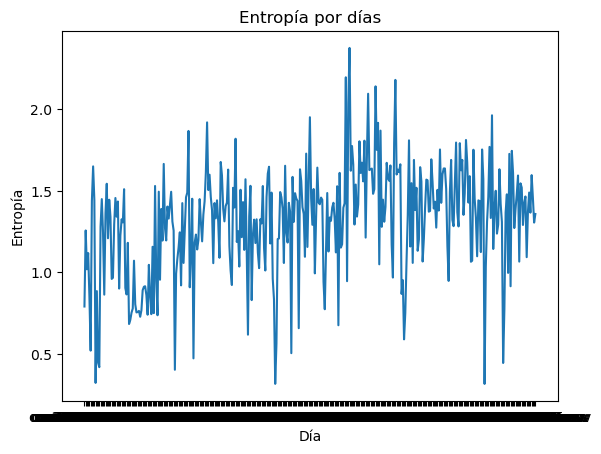

In [23]:
##Dibujamos el gráfico con los datos del diccionario##
claves_lwst1_norm = list(dicc_entropia_lwrstar1_norm.keys())
valores_lwst1_norm = [x[0] for x in list(dicc_entropia_lwrstar1_norm.values())]



fig, ax = plt.subplots()
ax.plot(claves_lwst1_norm, valores_lwst1_norm)

ax.set_title('Entropía por días')
ax.set_xlabel('Día')
ax.set_ylabel('Entropía')
plt.show()

In [24]:
clave_max_lwrstar1_norm = max(dicc_entropia_lwrstar1_norm, key=dicc_entropia_lwrstar1_norm.get)
clave_min_lwrstar1_norm = min(dicc_entropia_lwrstar1_norm, key=dicc_entropia_lwrstar1_norm.get)

print("La clave asociada al valor máximo mediante Lower Star es:", clave_max_lwrstar1_norm, " con entropía igual a: ", dicc_entropia_lwrstar1_norm[clave_max_lwrstar1_norm])
print("La clave asociada al valor mínimo mediante Lower Star es:", clave_min_lwrstar1_norm, " con entropía igual a: ", dicc_entropia_lwrstar1_norm[clave_min_lwrstar1_norm])

matriz_maxima_lwrstar1_norm = lee_archivo_dev_matriz(clave_max_lwrstar1_norm)
matriz_minima_lwrstar1_norm = lee_archivo_dev_matriz(clave_min_lwrstar1_norm)
print("La matriz con mayor entropía mediante Lower Star es:")
print(matriz_maxima_lwrstar1_norm)
print("======================================================")
print("La matriz con menor entropía mediante Lower Star es:")
print(matriz_minima_lwrstar1_norm)

La clave asociada al valor máximo mediante Lower Star es: occ2017215.csv  con entropía igual a:  [2.37714438]
La clave asociada al valor mínimo mediante Lower Star es: occ2017324.csv  con entropía igual a:  [0.31606163]
La matriz con mayor entropía mediante Lower Star es:
[[ 19556 128308   4514   1211    547    509    328    309    277    215
     436    132    134    119    113     91     70     69     57    985]
 [  6491  21913   1286    312    108     97     44     43     31     39
      36     19     17      7     17     12     15     15      9    183]
 [  2879   7759   1881    213     69     79     65    211     91     39
      29     12     14      8     13      3      5      5      4     96]
 [  1507   3933    130     53     79     95     33     32     14     18
       6     14      9      4      5      4      4      4      2     89]
 [   848   2168     48     31     33     96     23     22      8     18
       8      4      2      2      6      4      4      3      3     45]
 [

<h3>5.3. Entropías calculadas con Upper Star normalizando la matriz.</h3>

In [25]:
carpeta = 'Datos/dailyOccmatrices'
mat2017 = [mat for mat in os.listdir(carpeta) if "occ2017" in mat]

##Creamos el diccionario en el que meteremos la entropía asociada a cada día para el gráfico##
dicc_entropia_lwrstar2_norm = {}
##Pondemos el minimo inicial como infinito puesto que cualquier valor va a ser menor##
minimo = float('inf')
##Recorremos todos los archivos y calculamos el mínimo número de puntos##
for nombre_archivo in mat2017:
    if nombre_archivo.endswith('.csv'): 
        ##Leemos el archivo y creamos la matriz##
        matrix = lee_archivo_dev_matriz(nombre_archivo)
        
        ##Calculamos los puntos con lower-star##
        diagrams = lower_star_img(-matrix)
        ##Si el número de puntos que obtenemos es menor que el mínimo, este pasa a ser el número de puntos actual##
        if len(diagrams)<minimo:
            minimo=len(diagrams)
##Restamos uno puesto que para cada día hay un punto con una componente infinita y este debemos ignorarlo puesto que no nos da información útil en nuestro caso##
minimo=minimo-1

##Volvemos a recorrer las matrices de cada día ahora si para calcular la entropía con el número mínimo de puntos (el mismo número de puntos para todos las matrices)##
for nombre_archivo in mat2017:
    if nombre_archivo.endswith('.csv'): 
        ##Leemos el archivo y creamos la matriz##
        matrix = lee_archivo_dev_matriz(nombre_archivo)
        matrix2 = normalizar(matrix)
        ##Sabiendo el mínimo número de puntos, calculamos homología con lower-star y entropía de los puntos mas alejados de la diagonal## 
        dgms_resultado = lower_star_img(-matrix2)
        dst_puntos = {}
        ##Para cada punto calculamos su distancia a la diagonal y la metemos en un diccionario##
        for punto in dgms_resultado:
            dst_puntos[tuple(punto)] = abs(punto[0]-punto[1])
        ##Metemos en una lista estos puntos ordenados por mayor distancia a la diagonal eliminando el punto infinito que es el que mayor distancia a la diagonal tendrá##
        puntos_mas_alejados = sorted(dst_puntos, key=dst_puntos.get, reverse=True)[1:minimo+1]
        ##Creamos una lista para cada día en la que meteremos los puntos que vamos a usar para calcular la entropía##
        puntos_mas_alejados_para_entropia = []
        ##Se hace de esta forma para que los puntos tengan el formato adecuado##
        for i in range(len(puntos_mas_alejados)):
            for j in range(len(dgms_resultado)):
                if puntos_mas_alejados[i][0]==dgms_resultado[j][0] and puntos_mas_alejados[i][1]==dgms_resultado[j][1]:
                    puntos_mas_alejados_para_entropia.append(dgms_resultado[j])        
        ##Transformamos la lista en un array para poder calcular la entropía##
        puntos_mas_alejados_para_entropia = np.array(puntos_mas_alejados_para_entropia)
        entropia = persim.persistent_entropy.persistent_entropy(puntos_mas_alejados_para_entropia, keep_inf=False, val_inf=None, normalize=False)
        ##Metemos en el diccionario final la entropía asociada al día en concreto##
        dicc_entropia_lwrstar2_norm[nombre_archivo] = entropia

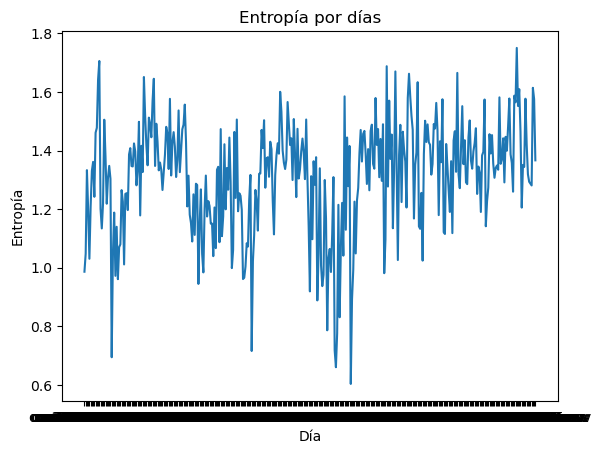

In [26]:
##Dibujamos el gráfico con los datos del diccionario##
claves_lwst2_norm = list(dicc_entropia_lwrstar2_norm.keys())
valores_lwst2_norm = list(dicc_entropia_lwrstar2_norm.values())


fig, ax = plt.subplots()
ax.plot(claves_lwst2_norm, valores_lwst2_norm)

ax.set_title('Entropía por días')
ax.set_xlabel('Día')
ax.set_ylabel('Entropía')
plt.show()

In [27]:
clave_max_lwrstar2_norm = max(dicc_entropia_lwrstar2_norm, key=dicc_entropia_lwrstar2_norm.get)
clave_min_lwrstar2_norm = min(dicc_entropia_lwrstar2_norm, key=dicc_entropia_lwrstar2_norm.get)

print("La clave asociada al valor máximo mediante Upper Star es:", clave_max_lwrstar1_norm, " con entropía igual a: ", dicc_entropia_lwrstar2_norm[clave_max_lwrstar2_norm])
print("La clave asociada al valor mínimo mediante Upper Star es:", clave_min_lwrstar1_norm, " con entropía igual a: ", dicc_entropia_lwrstar2_norm[clave_min_lwrstar2_norm])

matriz_maxima_lwrstar2_norm = lee_archivo_dev_matriz(clave_max_lwrstar2_norm)
matriz_minima_lwrstar2_norm = lee_archivo_dev_matriz(clave_min_lwrstar2_norm)
print("La matriz con mayor entropía mediante Upper Star es:")
print(matriz_maxima_lwrstar2_norm)
print("======================================================")
print("La matriz con menor entropía mediante Upper Star es:")
print(matriz_minima_lwrstar2_norm)

La clave asociada al valor máximo mediante Upper Star es: occ2017215.csv  con entropía igual a:  [1.75061544]
La clave asociada al valor mínimo mediante Upper Star es: occ2017324.csv  con entropía igual a:  [0.60328699]
La matriz con mayor entropía mediante Upper Star es:
[[ 28309 252806  11172   2067    998    783    449    448    397    396
     478    190    165    160    156    122    117     96     84   1976]
 [  5409  32067   1869    295    134    110     47     61     47     30
      32     24     21     30     22     22     19     16     17    325]
 [  2040  10245    436    169   1104     79     46     34     24     25
      19     26     22     14      9      8      7      7     11    118]
 [   974   4337    419    133    101     95     36     34     25     18
      13     11     13     14     13     11     10     10      4    103]
 [   599   2650     82     47     43    125     20     22     19     16
      16     11      5     10      8      5      2      7      3     69]
 [